In [4]:
from webtableparser import WebTableParser
import pandas as pd
# import numpy as np
# import re

site = WebTableParser()
site.create('https://www.fundsexplorer.com.br/ranking', 'table table-hover')
table = site.capture()
df = site.parse(table)


In [5]:
# Dataframe manipulation should be done according with the table
df.columns = ['codigo', 'setor', 'precoatualR$', 'liqdiariaNeg', 'dividR$', 'divyield%', 'dy3macum%', 'dy6macum%', 'dy12macum%', 'dy3mmedia%', 'dy6mmedia%', 'dy12mmedia%', 'dyano%',  'varpreco%', 'rentper%', 'rentacum%', 'patrliqR$', 'vpaR$', 'p/vpaN', 'dypatr%', 'varpatr%', 'rentpatrper%', 'rentpatracum%', 'vacfisica%', 'vacfinan%', 'qtdativosN']
df = df.applymap(lambda x: str(x).replace('R$', ''))
df = df.applymap(lambda x: str(x).replace('%', ''))
df['precoatualR$'] = df['precoatualR$'].apply(lambda x: str(x).replace('.', ''))
df['patrliqR$'] = df['patrliqR$'].apply(lambda x: str(x).replace('.', ''))
df['vpaR$'] = df['vpaR$'].apply(lambda x: str(x).replace('.', ''))
df = df.applymap(lambda x: str(x).replace(',', '.'))
df['setor'] = df['setor'].apply(lambda x: str(x).replace('Ã', 'i'))
# df['setor'] = df['setor'].apply(lambda x: re.sub(r'Ã ', 'i', x)) #alternative using regex (import re needed)

In [6]:
df['codigo'] = df['codigo'].astype('string')
df['setor'] = df['setor'].astype('string')
df['precoatualR$'] = pd.to_numeric(df['precoatualR$'], errors='coerce')
df['liqdiariaNeg'] = pd.to_numeric(df['liqdiariaNeg'], errors='coerce')
df['dividR$'] = pd.to_numeric(df['dividR$'], errors='coerce')
df['divyield%'] = pd.to_numeric(df['divyield%'], errors='coerce')
df['dy3macum%'] = pd.to_numeric(df['dy3macum%'], errors='coerce')
df['dy6macum%'] = pd.to_numeric(df['dy6macum%'], errors='coerce')
df['dy12macum%'] = pd.to_numeric(df['dy12macum%'], errors='coerce')
df['dy3mmedia%'] = pd.to_numeric(df['dy3mmedia%'], errors='coerce')
df['dy6mmedia%'] = pd.to_numeric(df['dy6mmedia%'], errors='coerce')
df['dy12mmedia%'] = pd.to_numeric(df['dy12mmedia%'], errors='coerce')
df['dyano%'] = pd.to_numeric(df['dyano%'], errors='coerce')
df['varpreco%'] = pd.to_numeric(df['varpreco%'], errors='coerce')
df['rentper%'] = pd.to_numeric(df['rentper%'], errors='coerce')
df['rentacum%'] = pd.to_numeric(df['rentacum%'], errors='coerce')
df['patrliqR$'] = pd.to_numeric(df['patrliqR$'], errors='coerce')
df['vpaR$'] = pd.to_numeric(df['vpaR$'], errors='coerce')
df['p/vpaN'] = pd.to_numeric(df['p/vpaN'], errors='coerce')
df['dypatr%'] = pd.to_numeric(df['dypatr%'], errors='coerce')
df['varpatr%'] = pd.to_numeric(df['varpatr%'], errors='coerce')
df['rentpatrper%'] = pd.to_numeric(df['rentpatrper%'], errors='coerce')
df['rentpatracum%'] = pd.to_numeric(df['rentpatracum%'], errors='coerce')
df['vacfisica%'] = pd.to_numeric(df['vacfisica%'], errors='coerce')
df['vacfinan%'] = pd.to_numeric(df['vacfinan%'], errors='coerce')
df['qtdativosN'] = pd.to_numeric(df['qtdativosN'], errors='coerce')
df = df.fillna(0)  # all NaNs filled with zero
# df['liqdiariaNeg'] = df['liqdiariaNeg'].fillna(0)  # column by column if needed
# df['liqdiariaNeg'] = df['liqdiariaNeg'].replace(np.nan, 0, regex=True)  # column by column with regex
df['liqdiariaNeg'] = df['liqdiariaNeg'].astype('int64')
df['qtdativosN'] = df['qtdativosN'].astype('int64')

In [7]:
# Filters in real state funds
fiis = df.loc[df['qtdativosN'] >= 10]  # 1st filter >= 10 assets

In [8]:
fiis = fiis.loc[fiis['liqdiariaNeg'] >= 1000]  # 2nd filter tradings >= 1000 tradings/day

In [9]:
fiis = fiis.loc[fiis['patrliqR$'] >= 500000000.00]  # 3rd filter assets > BRL 500 MM

In [10]:
fiis = fiis.loc[fiis['dy12macum%'] >= 4.00]  # 4th filter DY > 4%

In [11]:
fiis = fiis.loc[fiis['p/vpaN'] <= 1.25]  # 5th filter P/VPA <= 1.25

In [12]:
fiis = fiis.loc[fiis['vacfisica%'] <= 15]  # 6th filter vacancy <= 15%

In [13]:
from matplotlib import pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
#py.init_notebook_mode(connected=True)

trace1 = go.Bar(x=fiis['codigo'],
                y=fiis['p/vpaN'])
trace2 = go.Bar(x=fiis['codigo'],
                y=fiis['dy12macum%'])
trace3 = go.Bar(x=fiis['codigo'],
                y=fiis['vacfisica%'])
data = [trace1, trace2, trace3]
py.plot(data)

'temp-plot.html'

<AxesSubplot:xlabel='codigo'>

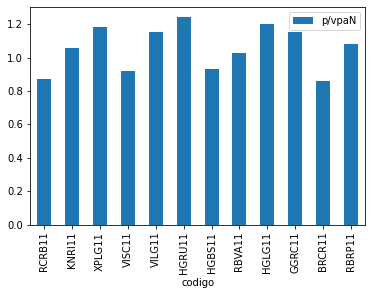

In [17]:

#pd.options.plotting.backend="plotly"
fiis.plot(kind='bar', x='codigo', y='p/vpaN')
#fiis['dy12macum%'].plot()